# **GDP Nowcasting**

In [77]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Retreive Economic and Financial Data from FRED API

These series are chosen for their predictive power for GDP, manageable number for LASSO regression, and alignment with monthly frequency.

### 1. Traditional Economic Indicators
- **Industrial Production Index (IPI)** – monthly  
- **Capacity Utilization** – monthly  
- **Manufacturing PMI / ISM Manufacturing Index** – monthly  
- **Non-Manufacturing PMI / ISM Services Index** – monthly  
- **Retail Sales ex-autos** – monthly  
- **Consumer Confidence Index (University of Michigan)** – monthly  
- **Durable Goods Orders** – monthly  
- **Housing Starts** – monthly  
- **Unemployment Rate** – monthly  
- **Average Hourly Earnings** – monthly  

### 2. Financial and Market Indicators
- **S&P 500 Index** – monthly (total returns or monthly change)  
- **VIX Index** – monthly (monthly average)  
- **10-Year Treasury Yield** – monthly  
- **Yield Curve Slope (10y-2y)** – monthly  
- **Corporate Bond Spreads (AAA-BBB)** – monthly  
- **Oil Prices (WTI)** – monthly  

### 3. Monetary and Credit Indicators
- **M2 Money Supply** – monthly  
- **Federal Funds Rate** – monthly  

### 4. Leading Indicators
- **Conference Board Leading Economic Index (LEI)** – monthly  
- **Chicago Fed National Activity Index (CFNAI)** – monthly  

In [84]:
def get_data(series_id, start_date, end_date, ts_frequency, ts_units):

    api_key = "ec80f911b34cc6ee8fa08f83c570efb4"
    base_url = 'https://api.stlouisfed.org/fred/'
    obs_endpoint = 'series/observations'

    obs_params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date,
    'frequency': ts_frequency,
    'units': ts_units
    }

    response = requests.get(base_url + obs_endpoint, params=obs_params)

    if response.status_code == 200:
        res_data = response.json()
        obs_data = pd.DataFrame(res_data['observations'])[['date','value']]
        obs_data['date'] = pd.to_datetime(obs_data['date'])
        obs_data.set_index('date', inplace=True)
        
        # Convert values to numeric (handle '.' or missing values)
        obs_data['value'] = pd.to_numeric(obs_data['value'], errors='coerce')
    else:
        print('Failed to retrieve data. Status code:', response.status_code)
    return obs_data


def plot(data, label, title, xlab, ylab, size_graph, grid=True, show_legend=True):
    plt.figure(figsize=size_graph)
    plt.plot(data, lw=1, color='black', label=label)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if show_legend:
        plt.legend()
    plt.grid(grid, alpha=0.6)
    plt.show()


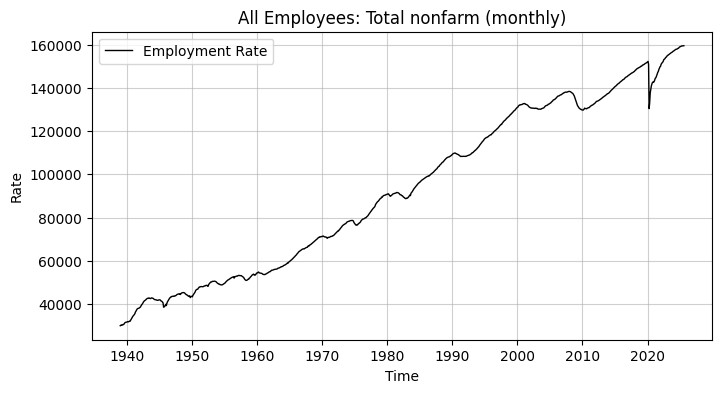

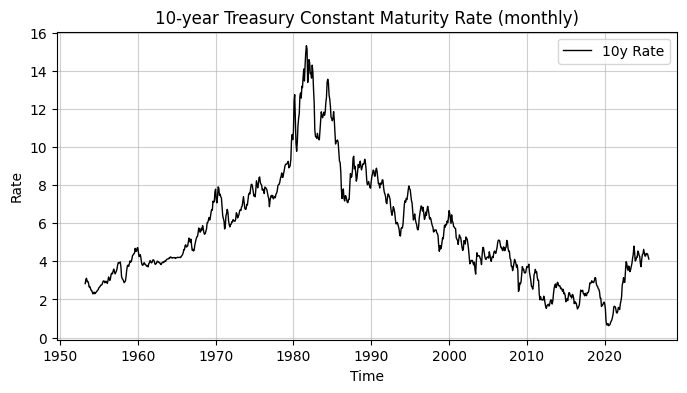

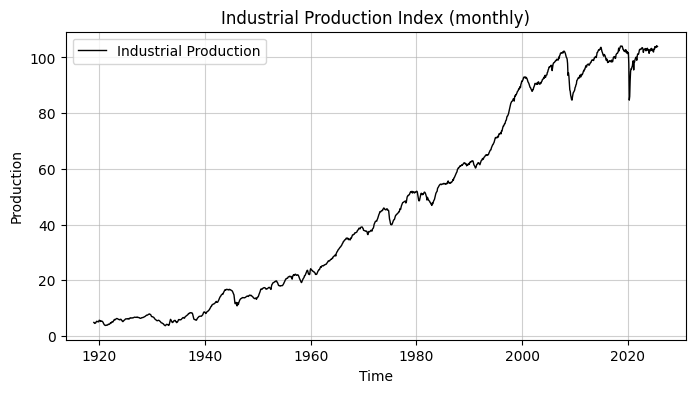

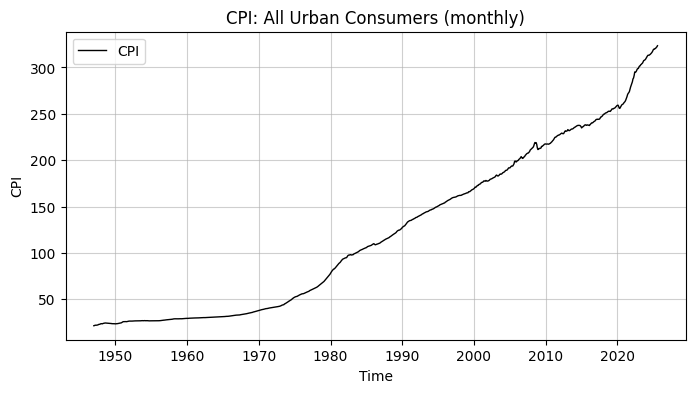

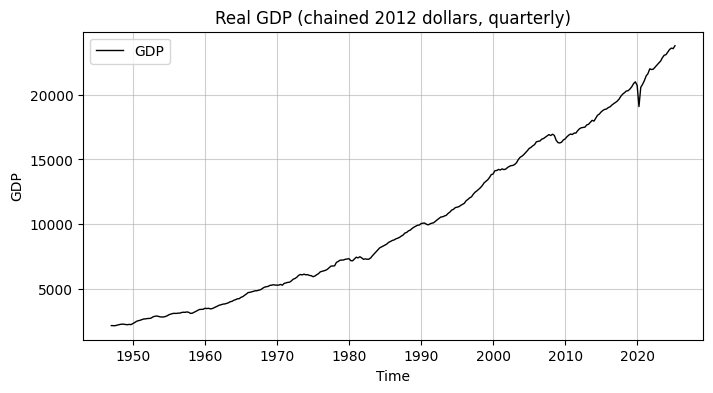

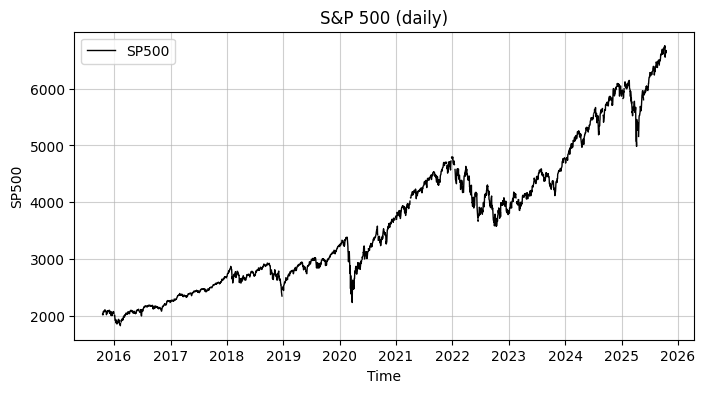

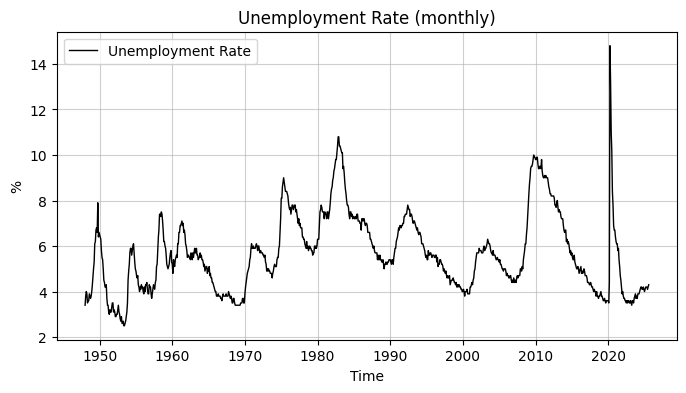

In [ ]:
fred_series = {
    "GDPC1": "Real GDP (chained 2012 dollars, quarterly)",  
    "INDPRO": "Industrial Production Index (monthly)",
    "NAPM": "ISM Manufacturing PMI (monthly)",  # NOT AVAILABLE 
    "RSAFS": "Retail Sales, Retail and Food Services (monthly)",
    "TCU": "Capacity Utilization (monthly)",
    "PAYEMS": "All Employees: Total nonfarm (monthly)",
    "UNRATE": "Unemployment Rate (monthly)",
    "ICSA": "Initial Unemployment Claims (weekly)",
    "CPIAUCSL": "CPI: All Urban Consumers (monthly)",
    "PCEPI": "PCE Price Index (monthly)",
    "UMCSENT": "University of Michigan Consumer Sentiment (monthly)",
    "CONCCONF": "Conference Board Consumer Confidence (monthly)",
    "GS10": "10-year Treasury Constant Maturity Rate (monthly)",
    "SP500": "S&P 500 (daily)",
}

emp = get_data(series_id = 'PAYEMS', start_date = None, end_date = None, ts_frequency = 'm', ts_units = 'lin')
plot(data=emp, title='All Employees: Total nonfarm (monthly)', label='Employment Rate', xlab='Time', ylab='Rate', size_graph=(8,4), grid=True, show_legend=True)

gs10 = get_data(series_id = 'GS10', start_date = None, end_date = None, ts_frequency = 'm', ts_units = 'lin')
plot(data=gs10, title='10-year Treasury Constant Maturity Rate (monthly)', label='10y Rate', xlab='Time', ylab='Rate', size_graph=(8,4), grid=True, show_legend=True)

prod = get_data(series_id = 'INDPRO', start_date = None, end_date = None, ts_frequency = 'm', ts_units = 'lin')
plot(data=prod, title='Industrial Production Index (monthly)', label='Industrial Production', xlab='Time', ylab='Production', size_graph=(8,4), grid=True, show_legend=True)

cpi = get_data(series_id = 'CPIAUCSL', start_date = None, end_date = None, ts_frequency = 'm', ts_units = 'lin')
plot(data=cpi, title='CPI: All Urban Consumers (monthly)', label='CPI', xlab='Time', ylab='CPI', size_graph=(8,4), grid=True, show_legend=True)

gdp = get_data(series_id = 'GDPC1', start_date = None, end_date = None, ts_frequency = 'q', ts_units = 'lin')
plot(data=gdp, title='Real GDP (chained 2012 dollars, quarterly)', label='GDP', xlab='Time', ylab='GDP', size_graph=(8,4), grid=True, show_legend=True)

sp500 = get_data(series_id = 'SP500', start_date = None, end_date = None, ts_frequency = 'd', ts_units = 'lin')
plot(data=sp500, title='S&P 500 (daily)', label='SP500', xlab='Time', ylab='SP500', size_graph=(8,4), grid=True, show_legend=True)

unrate = get_data(series_id = 'UNRATE', start_date = None, end_date = None, ts_frequency = 'm', ts_units = 'lin')
plot(data=unrate, title='Unemployment Rate (monthly)', label='Unemployment Rate', xlab='Time', ylab='%', size_graph=(8,4), grid=True, show_legend=True)